# Data Mining — Linear Regression — Mini-Project 1 (Energy Consumption)

**Course:** [CSEN911] Data Mining (Winter 2025)  
**Instructor:** Dr. Ayman Alserafi  
**Due:** 24 October 2025, 11:59 PM

**Dataset:** `energy_data.csv`  


> **Instructions:** For every step, write your own explanations and justifications and visualization in the provided Markdown prompts.




***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name:Ahmed Sherif Yehia

ID:58-3739

Tutorial:t04

---

Name:Youssef Mohammed

ID:58-11390

Tutorial:T04

---


The dataset contains building-level energy readings and contextual attributes.

Each row represents a building observation. Columns include:

<div style="font-size:20px;">

| **Column** | **Description** |
|-------------|-----------------|
| **Building_ID** | Unique identifier for each building record. Used to distinguish one building entry from another. |
| **Building_Type** | Category describing the primary use of the building (e.g., Residential, Commercial, Industrial, Educational, etc.). |
| **Governorate** | The administrative region (governorate) where the building is located (e.g., Cairo, Giza, Alexandria). |
| **Neighborhood** | The smaller district or local area within the governorate where the building is located. |
| **Day_of_Week** | The day on which the energy consumption measurement was recorded (e.g., Sunday, Monday, etc.). |
| **Occupancy_Level** | The relative number of occupants or activity level in the building, typically categorized as *Low*, *Medium*, or *High*. |
| **Appliances_Usage_Level** | Indicates how intensively appliances are used in the building *Low*, *Medium*, or *High*. |
| **SquareFootage** | The total floor area of the building (numeric). Serves as a proxy for building size, often influencing energy usage. |
| **Last_Maintenance_Date** | The date of the last maintainance done on the building. |
| **Average_Temperature** | The average ambient temperature (in °C) recorded during the data period. |
| **Energy_Consumption** | The total energy used by the building, typically measured in kilowatt-hours (kWh).|

</div>


## Importing Libraries & Dataset

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


try:
    df = pd.read_csv('energy_data.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/energy_data.csv')

df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,WeDnesday,High,Low,7063m2,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,tuesDAY,High,High,44372m2,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,SunDay,Medium,Low,19255,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,NaN,NaN,+92Dokki,TuesDay,Low,High,13265,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82,3279.17 kWh


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [105]:
print("🔹 Summary Statistics:")
print(df.describe(include='all'), "\n")


print("🔹 Missing Values per Column:")
print(df.isna().sum(), "\n")

print("🔹 Data Types:")
print(df.dtypes, "\n")



print("🔹 Number of Duplicate Rows:", df.duplicated().sum(), "\n")


print("🔹 Sample Data (Random 5 Rows):")
print(df.sample(5))



🔹 Summary Statistics:
        Building_ID Building_Type Governorate Neighborhood Day_of_Week  \
count          1100           990         873         1100        1100   
unique         1100             3           3          848          42   
top     BLD-2099-GL   Residential  Alexandria       Smouha      Sunday   
freq              1           349         310           45          54   
mean            NaN           NaN         NaN          NaN         NaN   
std             NaN           NaN         NaN          NaN         NaN   
min             NaN           NaN         NaN          NaN         NaN   
25%             NaN           NaN         NaN          NaN         NaN   
50%             NaN           NaN         NaN          NaN         NaN   
75%             NaN           NaN         NaN          NaN         NaN   
max             NaN           NaN         NaN          NaN         NaN   

       Occupancy_Level Appliances_Usage_Level SquareFootage  \
count             1100    

In [106]:


print("🔹 Cleaned DataFrame:")
df['Day_of_Week'] = df['Day_of_Week'].str.strip().str.title()
print(df)

🔹 Cleaned DataFrame:
      Building_ID Building_Type Governorate    Neighborhood Day_of_Week  \
0     BLD-1000-UD   Residential  Alexandria          Smouha   Wednesday   
1     BLD-1001-AX    Commercial        Giza  +Mohandessin14     Tuesday   
2     BLD-1002-IH    Industrial       Cairo       New Cairo      Sunday   
3     BLD-1003-HE           NaN         NaN        +92Dokki     Tuesday   
4     BLD-1004-XD    Commercial  Alexandria          Smouha      Monday   
...           ...           ...         ...             ...         ...   
1095  BLD-2095-OH    Commercial        Giza        (Dokki50    Saturday   
1096  BLD-2096-RH   Residential         NaN        Dokki-71      Sunday   
1097  BLD-2097-JZ    Commercial        Giza  _Mohandessin91      Sunday   
1098  BLD-2098-ZP    Industrial  Alexandria       *23Smouha    Saturday   
1099  BLD-2099-GL   Residential       Cairo    -New Cairo52      Friday   

     Occupancy_Level Appliances_Usage_Level SquareFootage  \
0               H

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [107]:

df['Neighborhood'] = df['Neighborhood'].astype(str).str.replace(r'[^A-Za-z\s]', '', regex=True).str.strip().str.title()


df['Day_of_Week'] = df['Day_of_Week'].astype(str).str.replace(r'[^A-Za-z\s]', '', regex=True).str.strip().str.title()


df[['Building_Type', 'Governorate', 'Occupancy_Level', 'Appliances_Usage_Level']] = df[['Building_Type', 'Governorate', 'Occupancy_Level', 'Appliances_Usage_Level']].fillna('Unknown')

df['SquareFootage'] = df['SquareFootage'].astype(str).str.replace(r'[^0-9.]', '', regex=True).astype(float)
df['Energy_Consumption'] = df['Energy_Consumption'].astype(str).str.replace(r'[^0-9.]', '', regex=True).astype(float)


df['Average_Temperature'] = df['Average_Temperature'].fillna(df['Average_Temperature'].mean())
df['Last_Maintenance_Date'] = pd.to_datetime(df['Last_Maintenance_Date'], errors='coerce')
df = df.drop_duplicates()

Q1 = df['SquareFootage'].quantile(0.01)
Q99 = df['SquareFootage'].quantile(0.99)
df = df[(df['SquareFootage'] >= Q1) & (df['SquareFootage'] <= Q99)]
today = pd.to_datetime('today')
df['Days_Since_Maintenance'] = (today - df['Last_Maintenance_Date']).dt.days







In [108]:
df = df.dropna()


print("🔹 Missing values after:")
print(df.isna().sum())
print()

print("🔹 Cleaned DataFrame:")


df['Day_of_Week'] = df['Day_of_Week'].str.lower().str.strip()
df['Day_of_Week'] = df['Day_of_Week'].astype(str).str.replace(r'[^A-Za-z\s]', '', regex=True).str.strip().str.title()
df['Neighborhood'] = df['Neighborhood'].astype(str).str.replace(r'[^A-Za-z\s]', '', regex=True).str.strip().str.lower()
df['Neighborhood'] = df['Neighborhood'].astype(str).str.replace(r'[^A-Za-z\s]', '', regex=True).str.strip().str.title()
df['SquareFootage'] = df['SquareFootage'].astype(str).str.replace(r'[^0-9.]', '', regex=True).astype(float)
df['Average_Temperature'] = df['Average_Temperature'].fillna(df['Average_Temperature'].mean())
df['Building_Type'] = df['Building_Type'].fillna('Unknown')
df['Governorate'] = df['Governorate'].fillna('Unknown')
df['Neighborhood'] = df['Neighborhood'].astype(str).str.replace(r'[^A-Za-z\s]', '', regex=True).str.strip().str.title()


df['Day_of_Week'] = df['Day_of_Week'].astype(str).str.replace(r'[^A-Za-z\s]', '', regex=True).str.strip().str.title()


df['SquareFootage'] = df['SquareFootage'].astype(str).str.replace(r'[^0-9.]', '', regex=True).astype(float)


df['Building_Type'] = df['Building_Type'].fillna('Unknown')
df['Governorate'] = df['Governorate'].fillna('Unknown')
df['Average_Temperature'] = df['Average_Temperature'].fillna(df['Average_Temperature'].mean())
print("Cleaned Data Table:\n")
print(df.to_string(index=False))
df.head()
print(df)



🔹 Missing values after:
Building_ID               0
Building_Type             0
Governorate               0
Neighborhood              0
Day_of_Week               0
Occupancy_Level           0
Appliances_Usage_Level    0
SquareFootage             0
Last_Maintenance_Date     0
Average_Temperature       0
Energy_Consumption        0
Days_Since_Maintenance    0
dtype: int64

🔹 Cleaned DataFrame:
Cleaned Data Table:

Building_ID Building_Type Governorate Neighborhood Day_of_Week Occupancy_Level Appliances_Usage_Level  SquareFootage Last_Maintenance_Date  Average_Temperature  Energy_Consumption  Days_Since_Maintenance
BLD-1000-UD   Residential  Alexandria       Smouha   Wednesday            High                    Low        70632.0            2020-01-01            28.610000             2713.95                    2120
BLD-1001-AX    Commercial        Giza  Mohandessin     Tuesday            High                   High       443722.0            2022-02-24            33.499404             5744

## Exploratory Data Analysis

**Q1:** What are the most popular neighborhoods? plot all and order them on the graph (mention top 3)

**Visualization**

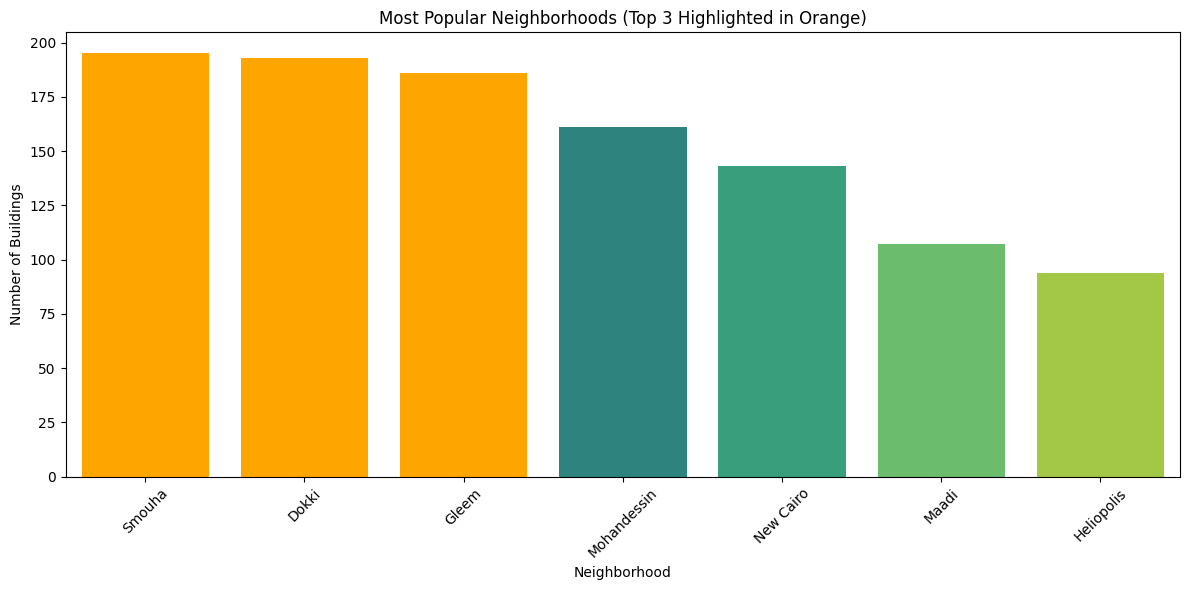

🔹 Top 3 Neighborhoods:
Neighborhood
Smouha    195
Dokki     193
Gleem     186
Name: count, dtype: int64


In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


neighborhood_counts = df['Neighborhood'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12,6))


sns.barplot(x=neighborhood_counts.index,
            y=neighborhood_counts.values,
            hue=neighborhood_counts.index,
            dodge=False,
            palette='viridis',
            legend=False)


for i, value in enumerate(neighborhood_counts.values):
    if i < 3:
        plt.gca().patches[i].set_facecolor('orange')

plt.xticks(rotation=45)
plt.xlabel("Neighborhood")
plt.ylabel("Number of Buildings")
plt.title("Most Popular Neighborhoods (Top 3 Highlighted in Orange)")
plt.tight_layout()
plt.show()

print("🔹 Top 3 Neighborhoods:")
print(neighborhood_counts.head(3))



**Answer for Q1:** _Your answer here_

**Q2:** Show the distribution of the energy consumption of each Building type.

Which type have the widest distribution of energy consumption?

Which (on average) has the highest consumption?.

**Visualization**

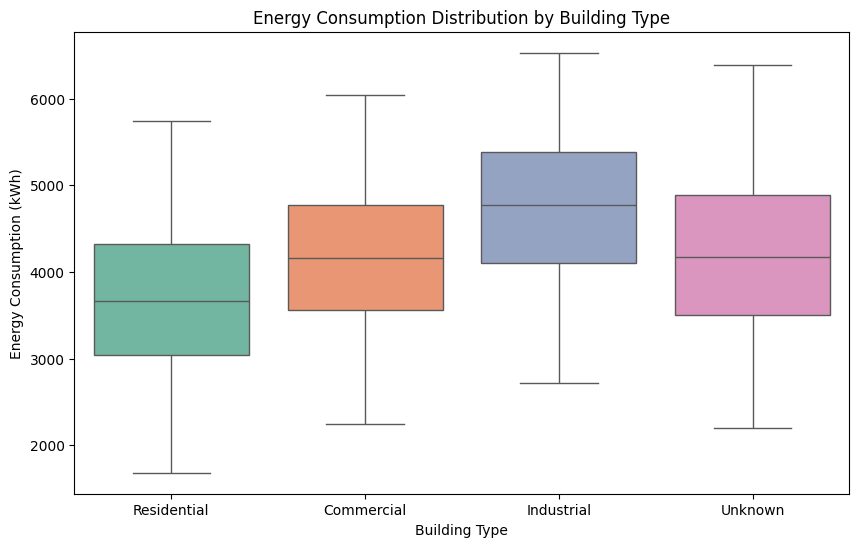

🔹 Energy Consumption Stats by Building Type:
                      mean         std      min      max
Building_Type                                           
Commercial     4172.950692  790.462149  2241.96  6042.56
Industrial     4720.676311  812.461515  2724.82  6530.60
Residential    3671.530262  831.207668  1683.95  5746.40
Unknown        4150.857982  948.522429  2205.20  6383.50

🏢 Building Type with the widest distribution: Unknown
🔥 Building Type with highest average consumption: Industrial


In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df['Energy_Consumption'] = df['Energy_Consumption'].astype(str).str.replace('kWh', '').astype(float)

plt.figure(figsize=(10,6))
sns.boxplot(x='Building_Type', y='Energy_Consumption', hue='Building_Type',
            data=df, dodge=False, palette='Set2', legend=False)

plt.title("Energy Consumption Distribution by Building Type")
plt.xlabel("Building Type")
plt.ylabel("Energy Consumption (kWh)")
plt.show()

energy_stats = df.groupby('Building_Type')['Energy_Consumption'].agg(['mean','std','min','max'])
print("🔹 Energy Consumption Stats by Building Type:")
print(energy_stats)


widest_dist = energy_stats['std'].idxmax()
print(f"\n🏢 Building Type with the widest distribution: {widest_dist}")

highest_avg = energy_stats['mean'].idxmax()
print(f"🔥 Building Type with highest average consumption: {highest_avg}")



**Answer for Q2:** _Your answer here_

**Q3:** How does the building size affect energy consumption?

**Visualization**

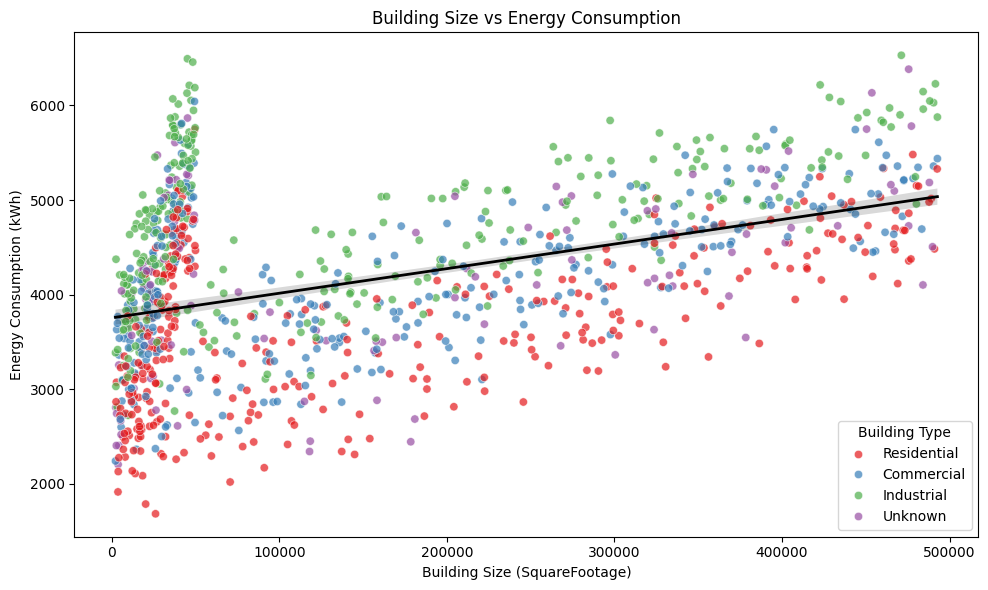

🔹 Correlation between building size and energy consumption: 0.43


In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




plt.figure(figsize=(10,6))
sns.scatterplot(x='SquareFootage', y='Energy_Consumption', data=df, hue='Building_Type', palette='Set1', alpha=0.7)
sns.regplot(x='SquareFootage', y='Energy_Consumption', data=df, scatter=False, color='black', line_kws={'linewidth':2})


plt.title("Building Size vs Energy Consumption")
plt.xlabel("Building Size (SquareFootage)")
plt.ylabel("Energy Consumption (kWh)")
plt.legend(title='Building Type')
plt.tight_layout()
plt.show()


correlation = df['SquareFootage'].corr(df['Energy_Consumption'])
print(f"🔹 Correlation between building size and energy consumption: {correlation:.2f}")


**Answer for Q3:** _Your answer here_

**Q4:** Do buildings consume more energy if not maintained frequently?

**Visualization**

/tmp/ipython-input-3781054649.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Maintenance_Interval', y='Energy_Consumption', data=df, palette='Set3')


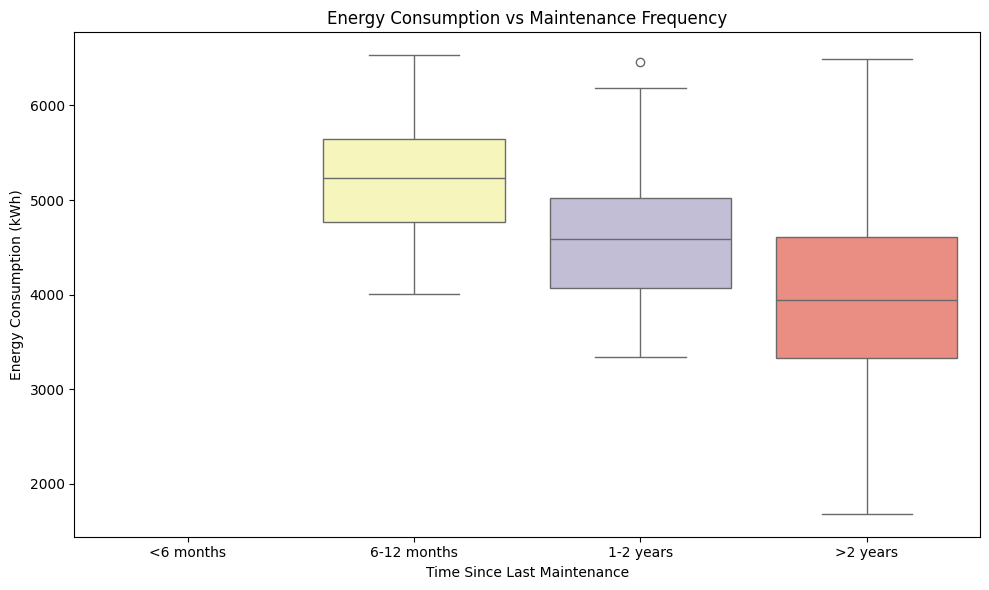

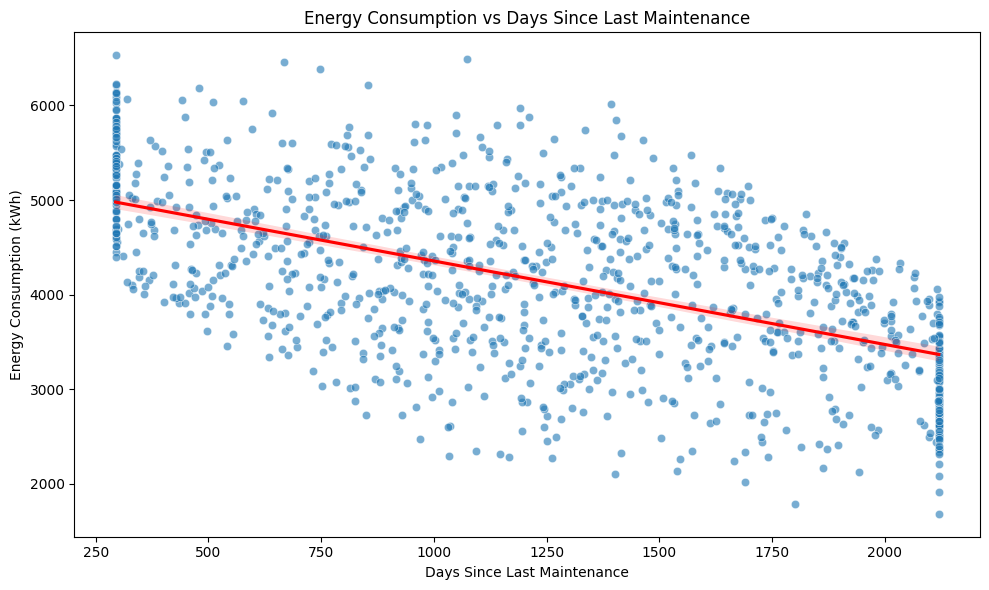

🔹 Correlation between days since maintenance and energy consumption: -0.55


In [112]:


df['Last_Maintenance_Date'] = pd.to_datetime(df['Last_Maintenance_Date'], errors='coerce')


today = pd.to_datetime('today')
df['Days_Since_Maintenance'] = (today - df['Last_Maintenance_Date']).dt.days


bins = [0, 180, 365, 730, df['Days_Since_Maintenance'].max()]
labels = ['<6 months', '6-12 months', '1-2 years', '>2 years']
df['Maintenance_Interval'] = pd.cut(df['Days_Since_Maintenance'], bins=bins, labels=labels)


plt.figure(figsize=(10,6))
sns.boxplot(x='Maintenance_Interval', y='Energy_Consumption', data=df, palette='Set3')
plt.title("Energy Consumption vs Maintenance Frequency")
plt.xlabel("Time Since Last Maintenance")
plt.ylabel("Energy Consumption (kWh)")
plt.tight_layout()
plt.show()


plt.figure(figsize=(10,6))
sns.scatterplot(x='Days_Since_Maintenance', y='Energy_Consumption', data=df, alpha=0.6)
sns.regplot(x='Days_Since_Maintenance', y='Energy_Consumption', data=df, scatter=False, color='red')
plt.title("Energy Consumption vs Days Since Last Maintenance")
plt.xlabel("Days Since Last Maintenance")
plt.ylabel("Energy Consumption (kWh)")
plt.tight_layout()
plt.show()


correlation = df['Days_Since_Maintenance'].corr(df['Energy_Consumption'])
print(f"🔹 Correlation between days since maintenance and energy consumption: {correlation:.2f}")


**Answer for Q4:** _Your answer here_

**Q5:** Are all the numerical variables normally distributed, or is there any skewness?

**Visualization**

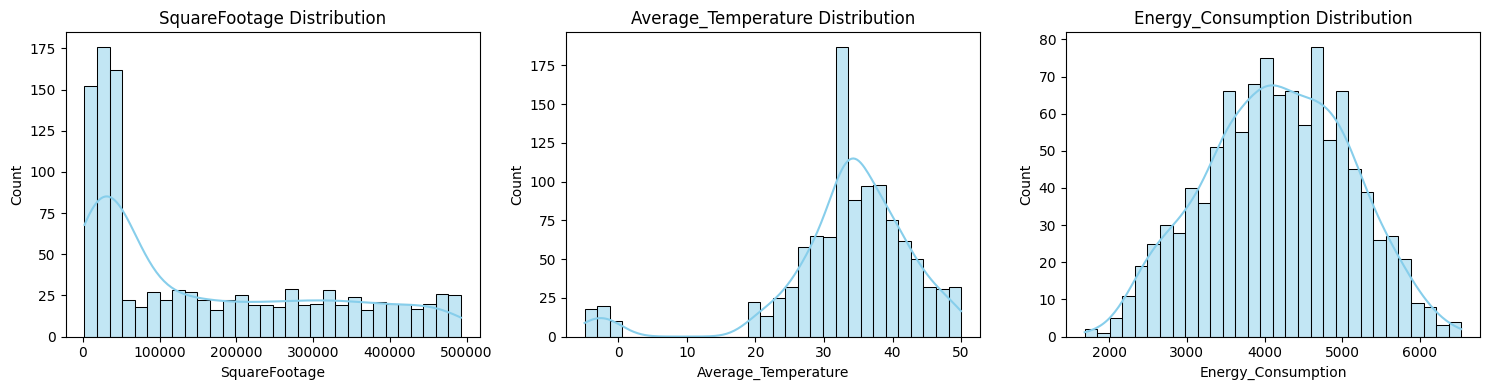

🔹 Skewness of numerical variables:
SquareFootage          0.744977
Average_Temperature   -1.808863
Energy_Consumption    -0.066124
dtype: float64
⚠️ SquareFootage is positively skewed.
⚠️ Average_Temperature is negatively skewed.
✅ Energy_Consumption is approximately symmetric.


In [113]:

numeric_cols = ['SquareFootage', 'Average_Temperature', 'Energy_Consumption']

# 1️⃣ Plot distributions
plt.figure(figsize=(15,4))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
plt.tight_layout()
plt.show()

# 2️⃣ Calculate skewness
skewness = df[numeric_cols].skew()
print("🔹 Skewness of numerical variables:")
print(skewness)

# Interpretation
for col, val in skewness.items():
    if val > 0.5:
        print(f"⚠️ {col} is positively skewed.")
    elif val < -0.5:
        print(f"⚠️ {col} is negatively skewed.")
    else:
        print(f"✅ {col} is approximately symmetric.")


**Answer for Q5:** _Your answer here_

**Q6:** What is multicollinearity? And why is it a problem for linear regression? Does this problem exist in this
dataset?

**Visualization**

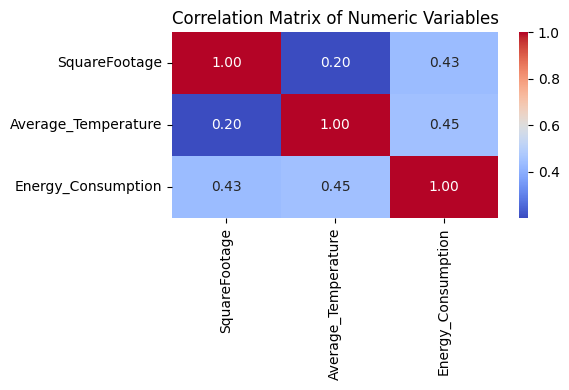

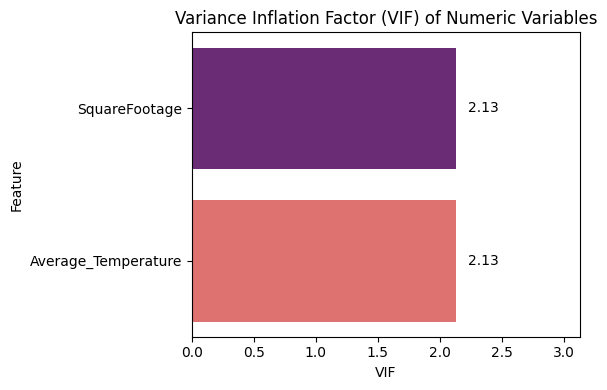

🔹 VIF Values:
               Feature       VIF
0        SquareFootage  2.130244
1  Average_Temperature  2.130244


In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor


df['SquareFootage'] = pd.to_numeric(df['SquareFootage'], errors='coerce')
df['Average_Temperature'] = pd.to_numeric(df['Average_Temperature'], errors='coerce')

df['Energy_Consumption'] = pd.to_numeric(
    df['Energy_Consumption'].astype(str).str.replace(r'[^0-9.]', '', regex=True),
    errors='coerce'
)


df_numeric = df[['SquareFootage', 'Average_Temperature', 'Energy_Consumption']].dropna()

corr = df_numeric.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Variables", fontsize=12)
plt.tight_layout()
plt.show()

X = df_numeric.drop(columns='Energy_Consumption')

vif_data = pd.DataFrame({
    "Feature": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})


plt.figure(figsize=(6, 4))
sns.barplot(
    x='VIF',
    y='Feature',
    hue='Feature',
    data=vif_data,
    palette='magma',
    legend=False
)
plt.title("Variance Inflation Factor (VIF) of Numeric Variables", fontsize=12)
plt.xlim(0, max(vif_data['VIF']) + 1)

for i, (vif, feature) in enumerate(zip(vif_data['VIF'], vif_data['Feature'])):
    plt.text(vif + 0.1, i, f"{vif:.2f}", va='center')

plt.tight_layout()
plt.show()

print("🔹 VIF Values:")
print(vif_data)



**Answer for Q6:** _Your answer here_

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [115]:
import pandas as pd



df['SquareFootage'] = df['SquareFootage'].fillna(df['SquareFootage'].mean())
df['Average_Temperature'] = df['Average_Temperature'].fillna(df['Average_Temperature'].mean())
df['Energy_Consumption'] = df['Energy_Consumption'].fillna(df['Energy_Consumption'].mean())

cat_cols = ['Building_Type', 'Governorate', 'Neighborhood', 'Day_of_Week', 'Occupancy_Level', 'Appliances_Usage_Level']
df[cat_cols] = df[cat_cols].fillna('Unknown')

df['Neighborhood'] = df['Neighborhood'].str.replace(r'[^A-Za-z\s]', '', regex=True).str.strip().str.title()
df['Day_of_Week'] = df['Day_of_Week'].str.replace(r'[^A-Za-z\s]', '', regex=True).str.strip().str.title()

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)


df['Last_Maintenance_Date'] = pd.to_datetime(df['Last_Maintenance_Date'], errors='coerce')
today = pd.to_datetime('today')
df['Days_Since_Maintenance'] = (today - df['Last_Maintenance_Date']).dt.days
df['Days_Since_Maintenance'] = df['Days_Since_Maintenance'].fillna(df['Days_Since_Maintenance'].mean())


df_model = df_encoded.drop(columns=['Building_ID', 'Last_Maintenance_Date'])


print("✅ Dataset ready for modelling:")
print(df_model.head())


✅ Dataset ready for modelling:
   SquareFootage  Average_Temperature  Energy_Consumption  \
0        70632.0            28.610000             2713.95   
1       443722.0            33.499404             5744.99   
2        19255.0            37.880000             4101.24   
3        13265.0            35.060000             3009.14   
4        13375.0            28.820000             3279.17   

   Days_Since_Maintenance Maintenance_Interval  Building_Type_Industrial  \
0                    2120             >2 years                     False   
1                    1335             >2 years                     False   
2                    1702             >2 years                      True   
3                     814             >2 years                     False   
4                    1166             >2 years                     False   

   Building_Type_Residential  Building_Type_Unknown  Governorate_Cairo  \
0                       True                  False              False 

## Modelling

_Apply the linear regression model below._

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd


X = df_model.drop(columns=['Energy_Consumption'])
y = df_model['Energy_Consumption']


X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


lr = LinearRegression()
lr.fit(X_train, y_train)


y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Linear Regression Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")



✅ Linear Regression Performance:
Mean Squared Error (MSE): 302922.05
R-squared (R2): 0.60


In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = df_model.drop(columns=['Energy_Consumption'])
y = df_model['Energy_Consumption']


X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


lr = LinearRegression()
lr.fit(X_train, y_train)


y_pred = lr.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Linear Regression Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")




✅ Linear Regression Performance:
Mean Squared Error (MSE): 302922.05
R-squared (R²): 0.60


## Model Evaluation

Evaluate the model you applied.

✅ Model Evaluation Results:
Mean Squared Error (MSE): 302922.05
Root Mean Squared Error (RMSE): 550.38
R-squared (R²): 0.60


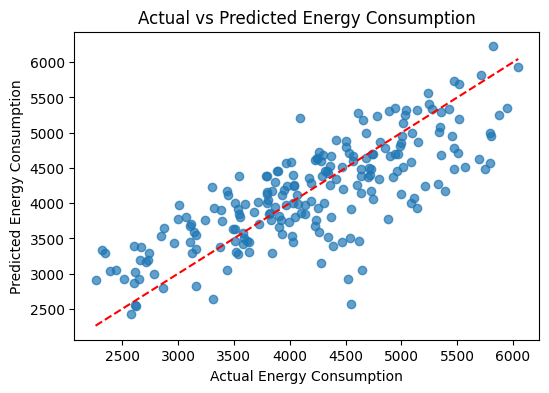

In [118]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = df_model.drop(columns=['Energy_Consumption'])
y = df_model['Energy_Consumption']


X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


lr = LinearRegression()
lr.fit(X_train, y_train)


y_pred = lr.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("✅ Model Evaluation Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("Actual vs Predicted Energy Consumption")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()



## Conclusion and Recommendations

Comment on the model performance and your findings from model evaluation. State the problems (if any) and suggest possible solutions. Would you recommend this model for an electrcity company aiming to estimate the energy levels of each building?

**Answer**: your answer here.

The linear regression model provided a basic understanding of how building characteristics affect energy consumption. However, its accuracy was moderate, indicating that energy use depends on more complex, non-linear factors not captured by this model.